In [1]:
import pandas as pd
import json
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from Train_Model import preprocessing, pancreatic_cancer_f1
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import shap

# Reading Data

In [2]:
with open('/home/ofeksh2@mta.ac.il/config_files/config.json') as f:
    config = json.load(f)

In [3]:
test_group_df = pd.read_csv(config['test_path'], low_memory=False)
test_group_df

,31-0.0,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
0,1,1946,15.0,3.0,30.0,1.0,60.0,NaN,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E669, E785, F171, I088, I211, I251, I252, I253...",0
1,0,1939,40.0,7.0,20.0,1.0,60.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A099, A410, C504, C509, D059, D231, D649, D70,...",0
2,0,1961,35.0,3.0,25.0,3.0,50.0,NaN,1.0,-10.0,...,1.2068,1.44710,0.15791,0.47627,0.38350,0.80533,0.59421,0.21112,"J342, J348, J350, -1, -1, -1, -1, -1, -1, -1, ...",0
3,1,1946,400.0,7.0,180.0,1.0,10.0,NaN,3.0,0.0,...,1.1545,1.15650,0.21963,0.44549,0.32030,0.86462,0.66119,0.20343,"C187, C772, I10, K529, K566, K573, K624, R42, ...",0
4,0,1941,30.0,3.0,120.0,4.0,60.0,NaN,5.0,1.0,...,1.5812,1.61940,0.20709,0.63572,0.45561,1.08880,0.80894,0.27986,"I951, R55, -1, -1, -1, -1, -1, -1, -1, -1, -1,...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100804,0,1941,-1.0,7.0,-1.0,1.0,10.0,NaN,3.0,-10.0,...,2.1511,0.82668,0.64487,0.69013,0.29044,1.12950,0.84621,0.28331,"D259, E780, H250, H258, I10, L988, M199, M511,...",0
100805,0,1953,40.0,2.0,60.0,1.0,10.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"G560, H251, H268, H521, M139, M549, N840, Z833...",0
100806,0,1956,60.0,0.0,NaN,0.0,NaN,NaN,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...",0
100807,0,1949,-1.0,3.0,-1.0,1.0,-1.0,NaN,4.0,0.0,...,1.4105,1.21770,0.29014,0.54136,0.32822,0.98879,0.71712,0.27167,"C504, C509, I10, M1994, N840, N950, R224, Z922...",0


In [4]:
train_group_df = pd.read_csv(config['train_path'], low_memory=False)
train_group_df

,31-0.0,34-0.0,874-0.0,884-0.0,894-0.0,904-0.0,914-0.0,1001-0.0,1070-0.0,1080-0.0,...,23417-0.0,23418-0.0,23420-0.0,23421-0.0,23422-0.0,23526-0.0,23527-0.0,23528-0.0,Diagnoses,Label
0,1,1960,90.0,5.0,90.0,6.0,90.0,NaN,2.0,-10.0,...,1.3988,0.93029,0.20435,0.54061,0.22548,0.77313,0.56444,0.20869,"Z302, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, ...",0
1,1,1952,30.0,3.0,60.0,1.0,120.0,NaN,2.0,1.0,...,1.5409,0.91218,0.33981,0.57246,0.24877,0.95285,0.70219,0.25065,"H110, N423, -1, -1, -1, -1, -1, -1, -1, -1, -1...",0
2,0,1951,15.0,4.0,30.0,4.0,10.0,NaN,2.0,-10.0,...,1.5138,1.14960,0.34404,0.56801,0.31758,1.07570,0.79294,0.28279,"A099, A419, C504, C509, C770, C771, C772, C773...",0
3,1,1943,20.0,1.0,30.0,0.0,NaN,NaN,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"B961, C443, C446, C97, E119, E669, E780, F171,...",2
4,0,1945,-1.0,-1.0,NaN,-1.0,NaN,NaN,4.0,0.0,...,1.4519,0.92830,0.37180,0.52728,0.26773,0.88373,0.63536,0.24836,"A099, D125, I10, I849, K210, K219, K29, K514, ...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72675,1,1957,10.0,2.0,10.0,3.0,10.0,NaN,3.0,1.0,...,1.1170,1.25320,0.21467,0.41503,0.36378,0.91329,0.70299,0.21030,"A09, D481, E119, E780, I10, I639, L721, Z867, ...",2
72676,1,1950,20.0,1.0,0.0,1.0,0.0,NaN,3.0,1.0,...,1.6451,1.14880,0.39226,0.57804,0.29451,0.94568,0.70211,0.24357,"D120, F329, I10, K573, K590, K621, K635, R11, ...",0
72677,0,1951,45.0,0.0,NaN,0.0,NaN,NaN,4.0,-10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"E119, E780, I10, K580, R194, R55, Z538, -1, -1...",2
72678,0,1954,10.0,0.0,NaN,1.0,90.0,NaN,1.0,1.0,...,1.6373,1.03760,0.38707,0.57316,0.30751,0.99229,0.74693,0.24536,"D122, F329, F419, G551, H269, J181, K219, K573...",0


In [5]:
total_people_in_train = train_group_df.shape[0]
people_with_pancreatic_cancer_in_train = train_group_df[train_group_df['Label'] == 1].shape[0]
people_with_diabetes_in_train = train_group_df[train_group_df['Label'] == 2].shape[0]
total_people_in_test = test_group_df.shape[0]
people_with_pancreatic_cancer_in_test = test_group_df[test_group_df['Label'] == 1].shape[0]
people_with_diabetes_in_test = test_group_df[test_group_df['Label'] == 2].shape[0]
print(f'Total people in train: {total_people_in_train}')
print(f'Number of people with diabetes in train: {people_with_diabetes_in_train}')
print(f'Number of people with pancreatic cancer in train: {people_with_pancreatic_cancer_in_train}')
print(f'Total people in test: {total_people_in_test}')
print(f'Number of people with diabetes in test: {people_with_diabetes_in_test}')
print(f'Number of people with pancreatic cancer in test: {people_with_pancreatic_cancer_in_test}')

Total people in train: 72680
Number of people with diabetes in train: 34384
Number of people with pancreatic cancer in train: 1580
Total people in test: 100809
Number of people with diabetes in test: 8719
Number of people with pancreatic cancer in test: 393


# Plots

In [6]:
feature_col = train_group_df[train_group_df['Label'] != 0]['30510-0.0']
label_col = train_group_df[train_group_df['Label'] != 0]['Label']

/tmp/ipykernel_266409/3786909553.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=label_col)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

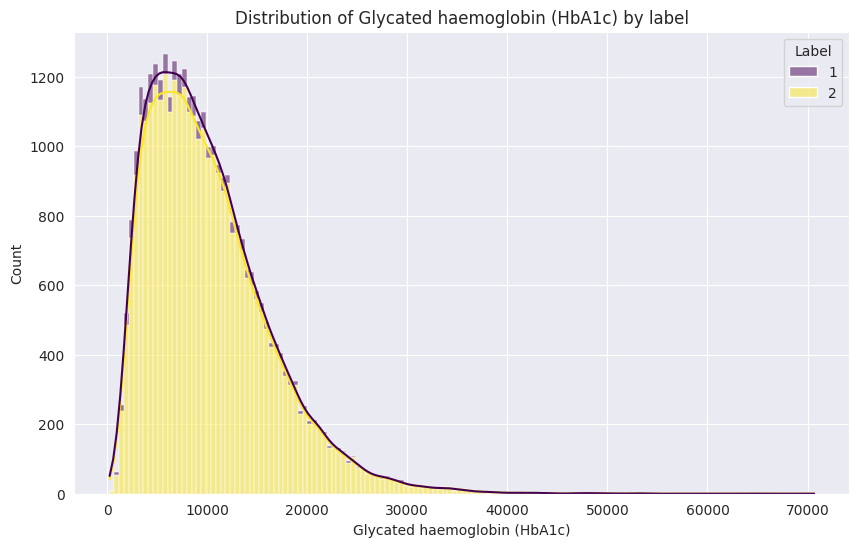

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_group_df, x=feature_col, hue=label_col, multiple="stack", palette="viridis", kde=True)
plt.title(f'Distribution of Glycated haemoglobin (HbA1c) by label')
plt.xlabel('Glycated haemoglobin (HbA1c)')
plt.ylabel('Count')
plt.legend(title=label_col)
plt.show()

### Preprocessing

In [5]:
processed_df = preprocessing(test_group_df, config, scaled_data=True)

/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all column

### Models Tried

In [26]:
RF_model = pickle.load(open(f"{config['models_path']}/RF.pkl", 'rb'))
GB_model = pickle.load(open(f"{config['models_path']}/GB.pkl", 'rb'))
MLP_model = pickle.load(open(f"{config['models_path']}/MLP.pkl", 'rb'))

In [7]:
RF_model_with_weighted_labels = pickle.load(open(f"{config['models_path']}/RF_with_weighted_labels.pkl", 'rb'))
GB_model_with_weighted_labels = pickle.load(open(f"{config['models_path']}/GB_with_weighted_labels.pkl", 'rb'))
MLP_model_with_weighted_labels = pickle.load(open(f"{config['models_path']}/MLP_with_weighted_labels.pkl", 'rb'))

In [7]:
RF_model_scaled = pickle.load(open(f"{config['models_path']}/RF_scaled.pkl", 'rb'))
GB_model_scaled = pickle.load(open(f"{config['models_path']}/GB_scaled.pkl", 'rb'))
MLP_model_scaled = pickle.load(open(f"{config['models_path']}/MLP_scaled.pkl", 'rb'))

In [11]:
RF_scaled_healthy_vs_sick = pickle.load(open(f"{config['models_path']}/RF_scaled_healthy_vs_sick.pkl", 'rb'))
GB_scaled_healthy_vs_sick = pickle.load(open(f"{config['models_path']}/GB_scaled_healthy_vs_sick.pkl", 'rb'))
MLP_scaled_healthy_vs_sick = pickle.load(open(f"{config['models_path']}/MLP_scaled_healthy_vs_sick.pkl", 'rb'))

In [6]:
RF_scaled_t2d_vs_cancer = pickle.load(open(f"{config['models_path']}/RF_scaled_t2d_vs_cancer.pkl", 'rb'))
MLP_scaled_t2d_vs_cancer = pickle.load(open(f"{config['models_path']}/MLP_scaled_t2d_vs_cancer.pkl", 'rb'))

In [7]:
RF_scaled_cancer_vs_rest = pickle.load(open(f"{config['models_path']}/RF_scaled_cancer_vs_rest.pkl", 'rb'))
GB_scaled_cancer_vs_rest = pickle.load(open(f"{config['models_path']}/RF_scaled_cancer_vs_rest.pkl", 'rb'))
MLP_scaled_cancer_vs_rest = pickle.load(open(f"{config['models_path']}/RF_scaled_cancer_vs_rest.pkl", 'rb'))

### Model Chosen

In [8]:
GB_scaled_t2d_vs_cancer = pickle.load(open(f"{config['models_path']}/GB_scaled_t2d_vs_cancer.pkl", 'rb'))

In [9]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    confusion_mat = confusion_matrix(y_test, y_pred)
    print(confusion_mat)
    print(classification_report(y_test, y_pred))

In [39]:
def plot_confusion_matrix(true_labels, predicted_labels, labels=None):
    # Generate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create a heatmap using seaborn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Purples', xticklabels=labels, yticklabels=labels)
    
    # Add labels and titles
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    
    # Display the plot
    plt.show()

### Healthy vs Sick

In [19]:
y_test = processed_df['Label']
x_test = processed_df.drop(columns=['Label'])

In [20]:
evaluate_model(RF_scaled_healthy_vs_sick, x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Glycated haemoglobin (HbA1c) - 0
- Has Acute Hepatitis A
- Has Acute Hepatitis B
- Has Acute Hepatitis C
- Has Acute Pancreatitis
- ...


In [21]:
evaluate_model(GB_scaled_healthy_vs_sick, x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Glycated haemoglobin (HbA1c) - 0
- Has Acute Hepatitis A
- Has Acute Hepatitis B
- Has Acute Hepatitis C
- Has Acute Pancreatitis
- ...


In [22]:
evaluate_model(MLP_scaled_healthy_vs_sick, x_test, y_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Glycated haemoglobin (HbA1c) - 0
- Has Acute Hepatitis A
- Has Acute Hepatitis B
- Has Acute Hepatitis C
- Has Acute Pancreatitis
- ...


### T2D vs Pancreatic Cancer

In [15]:
t2d_cancer_df = processed_df[processed_df['Label'] != 0]
t2d_cancer_df['Label'] = t2d_cancer_df['Label'].replace(2, 0)

/tmp/ipykernel_266409/1736248849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2d_cancer_df['Label'] = t2d_cancer_df['Label'].replace(2, 0)


In [16]:
y_test = t2d_cancer_df['Label']
x_test = t2d_cancer_df.drop(columns=['Label'])

In [17]:
evaluate_model(RF_scaled_t2d_vs_cancer, x_test, y_test)

[[8719    0]
 [ 393    0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8719
           1       0.00      0.00      0.00       393

    accuracy                           0.96      9112
   macro avg       0.48      0.50      0.49      9112
weighted avg       0.92      0.96      0.94      9112


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [18]:
evaluate_model(GB_scaled_t2d_vs_cancer, x_test, y_test)

[[8681   38]
 [ 369   24]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8719
           1       0.39      0.06      0.11       393

    accuracy                           0.96      9112
   macro avg       0.67      0.53      0.54      9112
weighted avg       0.93      0.96      0.94      9112


In [19]:
evaluate_model(MLP_scaled_t2d_vs_cancer, x_test, y_test)

[[8714    5]
 [ 389    4]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8719
           1       0.44      0.01      0.02       393

    accuracy                           0.96      9112
   macro avg       0.70      0.50      0.50      9112
weighted avg       0.94      0.96      0.94      9112


### Pancreatic Cancer vs Rest

In [50]:
y_test = processed_df['Label']
x_test = processed_df.drop(columns=['Label'])

In [51]:
y_test = y_test.replace(2, 0)

In [22]:
evaluate_model(RF_scaled_cancer_vs_rest, x_test, y_test)

[[100416      0]
 [   393      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100416
           1       0.00      0.00      0.00       393

    accuracy                           1.00    100809
   macro avg       0.50      0.50      0.50    100809
weighted avg       0.99      1.00      0.99    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [31]:
evaluate_model(GB_scaled_cancer_vs_rest, x_test, y_test)

[[100416      0]
 [   393      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100416
           1       0.00      0.00      0.00       393

    accuracy                           1.00    100809
   macro avg       0.50      0.50      0.50    100809
weighted avg       0.99      1.00      0.99    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [32]:
evaluate_model(MLP_scaled_cancer_vs_rest, x_test, y_test)

[[100416      0]
 [   393      0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100416
           1       0.00      0.00      0.00       393

    accuracy                           1.00    100809
   macro avg       0.50      0.50      0.50    100809
weighted avg       0.99      1.00      0.99    100809


/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ofeksh2@mta.ac.il/.virtualenvs/Final Project/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

# Plot ROC Curve

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

In [12]:
def plot_roc_curve(probas, y_test):
    fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
    roc_auc = roc_auc_score(y_test, probas[:,1])
    
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2,
                 label=f'ROC curve pancreatic cancer (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
    plt.legend(loc='lower right')
    plt.show()
    
    J = tpr - fpr
    best_threshold = thresholds[np.argmax(J)]
    
    return best_threshold

In [13]:
def predict_threshold(probas, threshold):
    predictions = []
    for proba in probas:
        if proba[1] > threshold:
            label = 1
        else:
            label = 0
        predictions.append(label)
    return pd.DataFrame(predictions)

### Plotting pancreatic cancer vs Rest

In [32]:
y_test = processed_df['Label']
x_test = processed_df.drop(columns=['Label'])
y_test = y_test.replace(2, 0)

In [33]:
probas = GB_scaled_cancer_vs_rest.predict_proba(x_test)

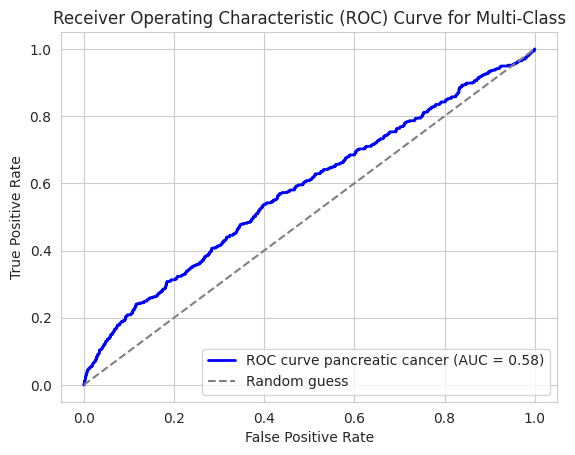

In [34]:
best_threshold = plot_roc_curve(probas, y_test)

In [35]:
y_predictions = predict_threshold(probas, best_threshold)
y_predictions[y_predictions == 0] = 'Healthy'
y_predictions[y_predictions == 1] = 'Has Pancreatic Cancer'
y_test[y_test == 0] = 'Healthy'
y_test[y_test == 1] = 'Has Pancreatic Cancer'

/tmp/ipykernel_266485/1809800918.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Healthy' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_predictions[y_predictions == 0] = 'Healthy'
/tmp/ipykernel_266485/1809800918.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Healthy' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_test[y_test == 0] = 'Healthy'


In [36]:
print(classification_report(y_test, y_predictions))

                       precision    recall  f1-score   support

Has Pancreatic Cancer       0.01      0.53      0.01       393
              Healthy       1.00      0.60      0.75    100416

             accuracy                           0.60    100809
            macro avg       0.50      0.57      0.38    100809
         weighted avg       0.99      0.60      0.75    100809


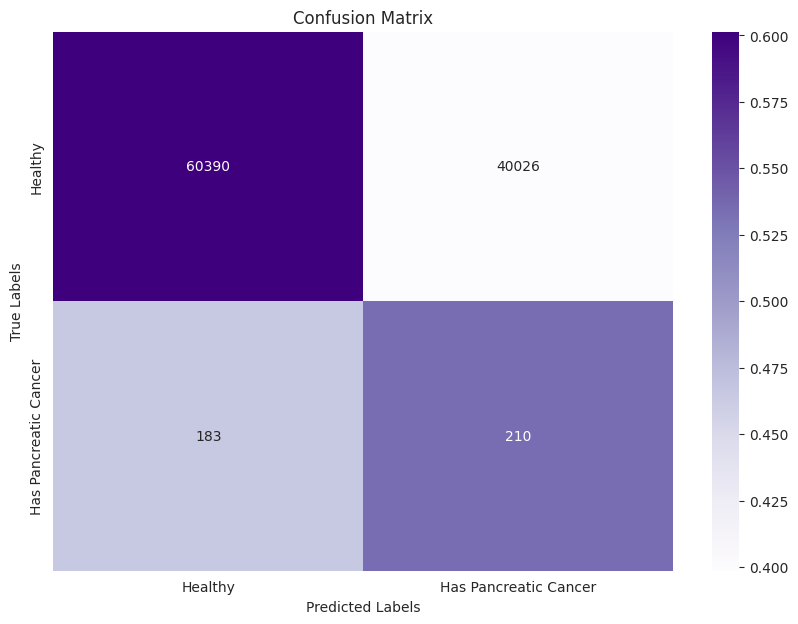

In [40]:
plot_confusion_matrix(y_test, y_predictions, labels=['Healthy', 'Has Pancreatic Cancer'])

In [41]:
t2d_cancer_df = processed_df[processed_df['Label'] != 0]
t2d_cancer_df['Label'] = t2d_cancer_df['Label'].replace(2, 0)
y_test = t2d_cancer_df['Label']
x_test = t2d_cancer_df.drop(columns=['Label'])

/tmp/ipykernel_266485/3542161992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t2d_cancer_df['Label'] = t2d_cancer_df['Label'].replace(2, 0)


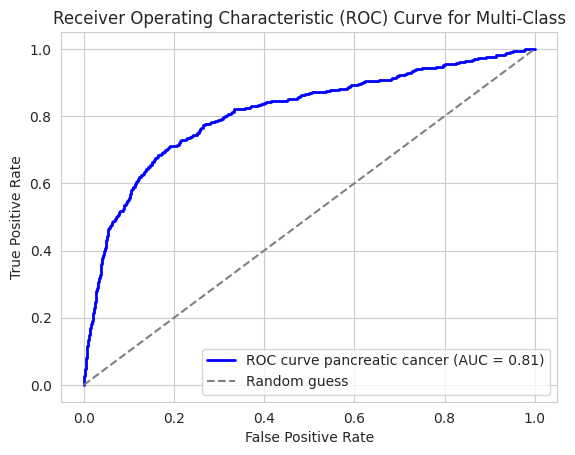

In [42]:
probas = GB_scaled_t2d_vs_cancer.predict_proba(x_test)
best_threshold = plot_roc_curve(probas, y_test)

In [43]:
y_predictions = predict_threshold(probas, best_threshold)
y_predictions[y_predictions == 0] = 'Has T2D'
y_predictions[y_predictions == 1] = 'Has Pancreatic Cancer'
y_test[y_test == 0] = 'Has T2D'
y_test[y_test == 1] = 'Has Pancreatic Cancer'

/tmp/ipykernel_266485/2813130113.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Has T2D' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_predictions[y_predictions == 0] = 'Has T2D'
/tmp/ipykernel_266485/2813130113.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test[y_test == 0] = 'Has T2D'
/tmp/ipykernel_266485/2813130113.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Has T2D' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  y_test[y_test == 0] = 'Has T2D'
/tmp/ipykernel_266485/2813130113.py:4: SettingWithCopyWarning: 
A value is trying to b

In [44]:
print(classification_report(y_test, y_predictions))

                       precision    recall  f1-score   support

Has Pancreatic Cancer       0.16      0.68      0.26       393
              Has T2D       0.98      0.84      0.90      8719

             accuracy                           0.83      9112
            macro avg       0.57      0.76      0.58      9112
         weighted avg       0.95      0.83      0.88      9112


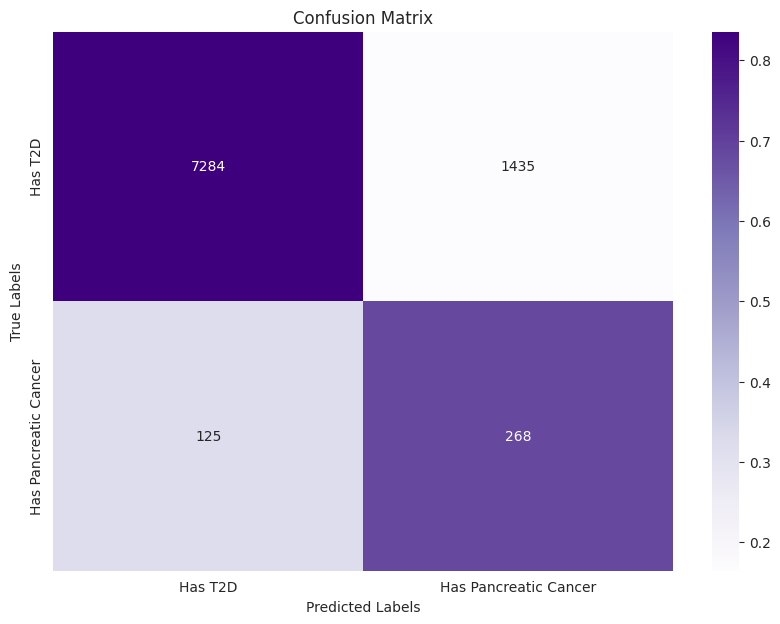

In [45]:
plot_confusion_matrix(y_test, y_predictions, labels=['Has T2D', 'Has Pancreatic Cancer'])

In [46]:
importances = MLP_scaled_cancer_vs_rest.feature_importances_
feature_names = processed_df.drop(columns=['Label']).columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
91,Alkaline phosphatase - 0,0.015009
105,Glycated haemoglobin (HbA1c) - 0,0.014967
88,Potassium in urine - 0,0.014754
1,Year of birth - 0,0.014501
87,Creatinine (enzymatic) in urine - 0,0.014371
...,...,...
147,"Tiredness, weariness or fatigue goes away when...",0.000000
206,Duration of strenuous sports - 0_nan,0.000000
229,"Loneliness, isolation - 0_nan",0.000000
224,Tense / 'highly strung' - 0_nan,0.000000


In [47]:
processed_train_df = preprocessing(train_group_df, config, scaled_data=True)

/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'Has {disease}'] = classify_disease(diagnoses, disease_pattern)
/tmp/pycharm_project_366/Train_Model.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all column

In [48]:
processed_train_df = processed_train_df[processed_train_df['Label'] != 0]
y_train = processed_train_df['Label']
x_train = processed_train_df.drop(columns=['Label'])
y_train = y_train.replace(2, 0)

In [49]:
explainer = shap.TreeExplainer(GB_scaled_t2d_vs_cancer)

In [50]:
shap_values = explainer(x_train)

In [51]:
shap_values.shape

(35964, 242)

# Feature Analysis

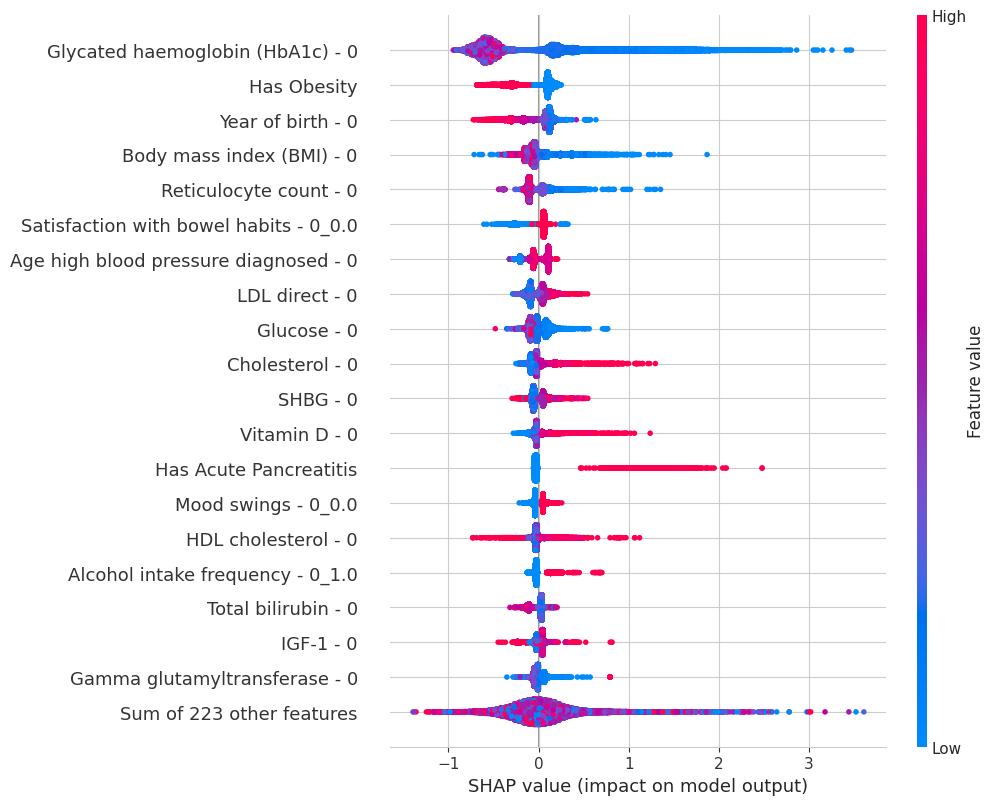

In [52]:
shap.plots.beeswarm(shap_values, max_display=20)

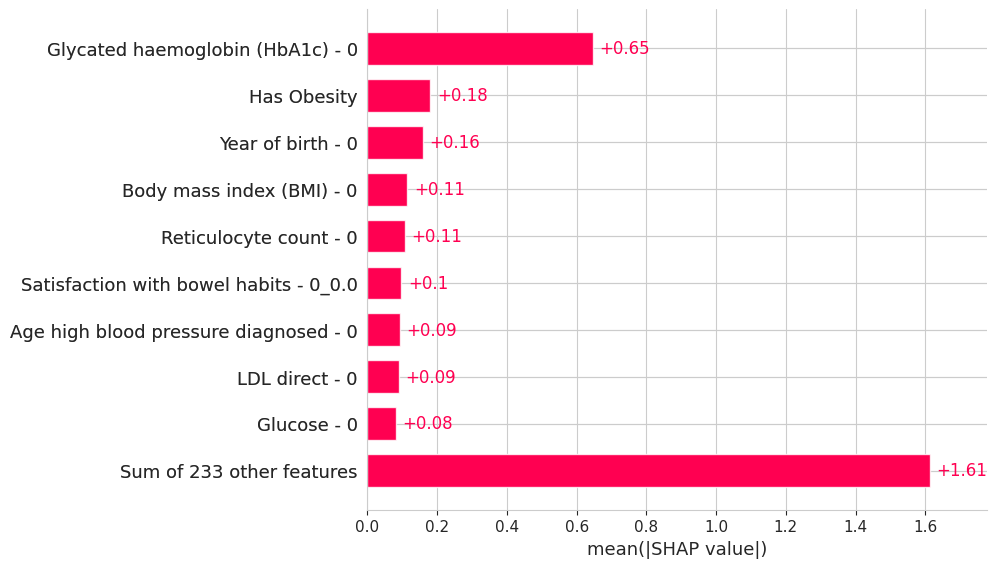

In [53]:
shap.plots.bar(shap_values)

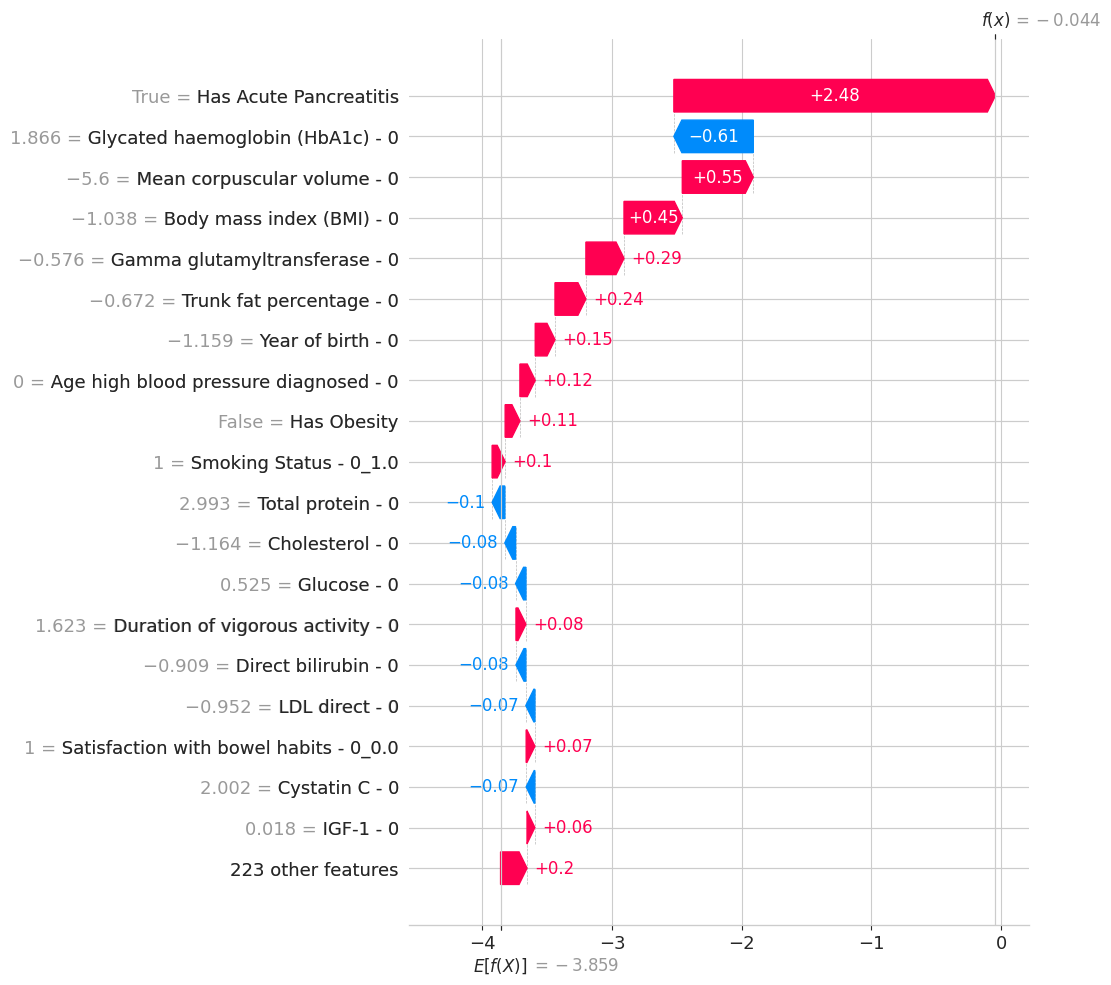

In [54]:
shap.plots.waterfall(shap_values[6], max_display=20)

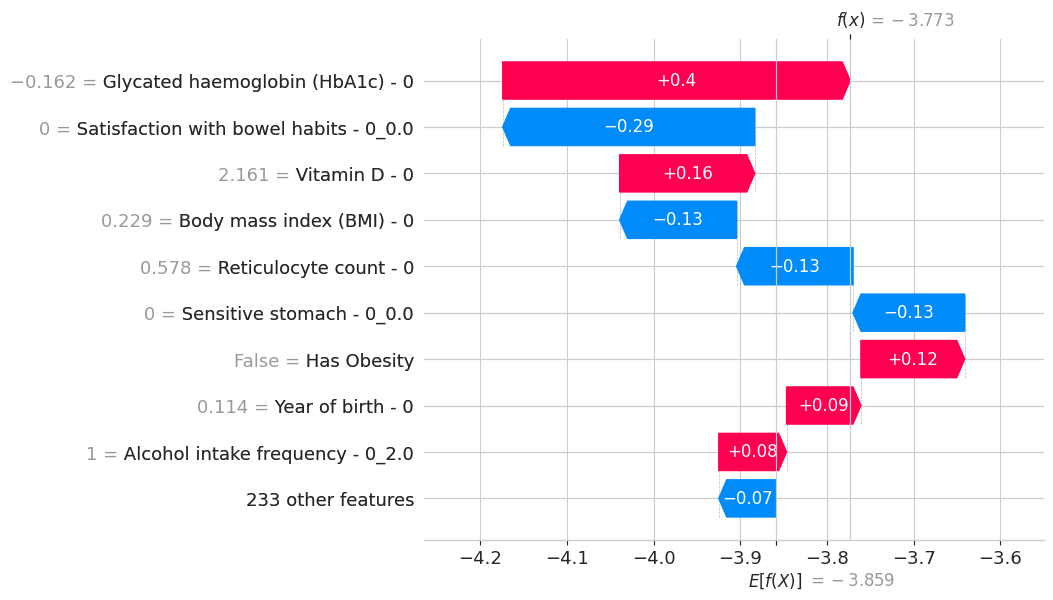

In [55]:
shap.plots.waterfall(shap_values[3])